In [1]:
!git clone https://github.com/interactiveaudiolab/course-deep-learning.git
# install common pacakges used for deep learning
!cd course-deep-learning/ && pip install -r requirements.txt

Cloning into 'course-deep-learning'...
remote: Enumerating objects: 575, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 575 (delta 15), reused 19 (delta 8), pack-reused 547 (from 1)
Receiving objects: 100% (575/575), 146.09 MiB | 8.71 MiB/s, done.
Resolving deltas: 100% (303/303), done.
Updating files: 100% (63/63), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/1

In [2]:
import time
import torch
# print(torch.__version__)
import torchvision
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data_dir = "./data/" # address to store the data
mnist_test = torchvision.datasets.MNIST(data_dir, train=False, download= True) # download the MNIST dataset
mnist_train_full = torchvision.datasets.MNIST(data_dir, train=True, download=True)
# in PyTorch, use random_split()
mnist_train, mnist_val = torch.utils.data.random_split(mnist_train_full, [55000, 5000])
type(mnist_train), type(mnist_val) # torch.utils.data.dataset.subset, iterable container, which we can fetch input-label pairs

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 132MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 33.4MB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 71.3MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 6.52MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



(torch.utils.data.dataset.Subset, torch.utils.data.dataset.Subset)

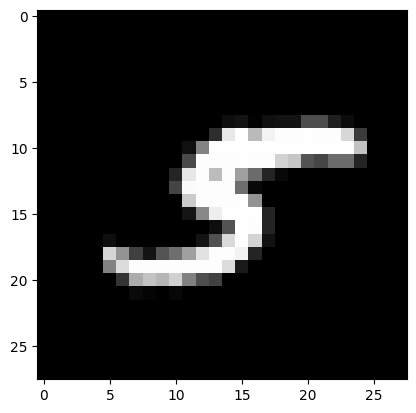

In [4]:
d = np.random.randint(0, len(mnist_test)) # get size using the len(),
plt.imshow(mnist_test[d][0], cmap = 'gray')

7
torch.Size([1, 28, 28])
Transformed image data:0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...


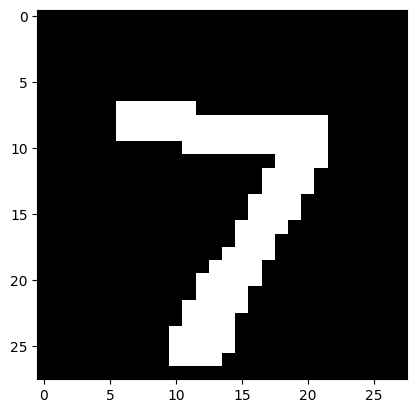

In [5]:
# stack multiple transformation using compose methods and personal function
transform = torchvision.transforms.Compose(
    [torchvision.transforms.ToTensor(),
     lambda x: x >0 ,
     lambda x: x.float()]
)
example_img, example_label = mnist_test[0]
transformed = transform(example_img)
print(example_label)
print(transformed.shape)
print(f"Transformed image data:{(','.join(str(p.item()) for p in transformed.flatten()))[:100]}...")
# why can't use transformed[d][1] to display.
# 1. MNIST can because it has PTL.Image object, which can display directly
# 2. When doing transformation, the result will be tensor object. and the dimension will be [1,28,28],where 1 represents the gray level(灰度)
# in order to transform into (28,28) and display in the PTL.Image, we need the squeeze() methods.
plt.imshow(transformed.squeeze(), cmap='gray')

In [6]:
# transformation for all train, val and test dataset
mnist_test = torchvision.datasets.MNIST(data_dir, train = False, download = False, transform = transform)
# load MNIST train dataset from the disk, because before we have finished download it to the disk
mnist_train_full = datasets.MNIST(data_dir, train = True, download = False, transform=transform)
mnist_train, mnist_val = torch.utils.data.random_split(mnist_train_full, [55000,5000])
example_img, example_label = mnist_test[0]

We want our training data is a random and shuffled dataset, so PyTorch provides a *DataLoader* class to handle the process starting from fetching data from a Dataset object, including shuffling, custom batch collation, and various random sampling schemes.

In [7]:
batch_size = 60
# initialize the DataLoader for each dataset
train_dataloader = torch.utils.data.DataLoader(mnist_train, batch_size = batch_size, shuffle = True)
val_dataloader = torch.utils.data.DataLoader(mnist_val, batch_size = batch_size, shuffle = True)
test_dataloader = torch.utils.data.DataLoader(mnist_test, batch_size = batch_size, shuffle = False)

# grab the first batch from our DataLoader objects
example_batch_img, example_batch_label = next(iter(train_dataloader))
# 4 dimensional, 60: batch_size, refers to the number of training examples utilized in one iteration of the training process
# one training iteration, there are 60 training examples
# 1 color channels
# 28*28 means the height and width.
print(f"Batch inputs shape:{example_batch_img.shape}")


Batch inputs shape:torch.Size([60, 1, 28, 28])


In [9]:
# Image Recognition
# Training model
class MNISTNetwork(torch.nn.Module):
  def __init__(self):
    super().__init__()

    # MNIST image are (1, 28, 28) (channels, width, height)
    self.layer_1 = torch.nn.Linear(28*28, 1024) # input: original pictures, width*height
    # output: 1024 features,
    self.layer_2 = torch.nn.Linear(1024, 10)
    self.relu = torch.nn.ReLU()

  def forward(self, x):
    batch_size, channels, width, height = x.size()
    x = x.view(batch_size, -1) # create an arrya of flattened images with dimension (batch_size, num_pixels)
    x = self.relu(self.layer_1(x))
    x = self.layer_2(x)

    return x

model = MNISTNetwork()
model


MNISTNetwork(
  (layer_1): Linear(in_features=784, out_features=1024, bias=True)
  (layer_2): Linear(in_features=1024, out_features=10, bias=True)
  (relu): ReLU()
)

In [10]:
# Classfication Loss
# Usually we used the cross-entropy method.
loss_fn = torch.nn.CrossEntropyLoss()

preds = torch.randn(batch_size, 10) # random "class score" vectors, each with 10 scores corresponding to digits
targets = torch.full((batch_size,), 7).long() # 'full' means using 7 to fill the (batch_size,1) dimension tensor
# transformed it into tensor.int64 dimension.

loss_fn(preds, targets)

tensor(2.8077)

In [12]:
# Picking an Optimizer: SGD
weights = torch.zeros(10).requires_grad_(True)
print(f"Starting weights: {weights}, Sum: {weights.sum().item()}")

opt = torch.optim.SGD([weights], lr = 1.00)
loss = 10 - weights.sum()
loss.backward()

opt.step()

print(f"Starting weights: {weights}, Sum: {weights.sum().item()}")

Starting weights: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True), Sum: 0.0
Starting weights: tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], requires_grad=True), Sum: 10.0


In [13]:
# The process of saving snapshots of a model during training is often called checkpointing,
# and PyTorch offers utilities to make saving and loading models simple
# In NN, it means saving weights(parameters),  the PyTorch models have a .state_dict() method
model = MNISTNetwork()
print("Names of network weights:", list(model.state_dict().keys()))
# save weights to the disk
torch.save(model.state_dict(), "dummy_weights.pt")
# load weights from the disk and overwrite network weights
model.load_state_dict(torch.load("dummy_weights.pt")) # useful when want to continue computing the result
model

Names of network weights: ['layer_1.weight', 'layer_1.bias', 'layer_2.weight', 'layer_2.bias']


<ipython-input-13-a0bc561fee94>:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("dummy_weights.pt"))


MNISTNetwork(
  (layer_1): Linear(in_features=784, out_features=1024, bias=True)
  (layer_2): Linear(in_features=1024, out_features=10, bias=True)
  (relu): ReLU()
)

In [25]:
# Put all together to construct a loop
def training_loop(save_path, epochs, batch_size, device = 'cpu'):
  # define several training utilities
    model = MNISTNetwork()
    model.to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr=0.0001, momentum=0.9)
    data_dir = './data/'

    transform = torchvision.transforms.Compose(
    [torchvision.transforms.ToTensor(),
     lambda x: x >0,
     lambda x: x.float()])

  # Load trainingset:
    mnist_test = torchvision.datasets.MNIST(data_dir, train = False, download = False, transform = transform)
    mnist_train_full = datasets.MNIST(data_dir, train = True, download = False, transform=transform)
    mnist_train, mnist_val = torch.utils.data.random_split(mnist_train_full, [55000,5000])

    train_dataloader = torch.utils.data.DataLoader(mnist_train, batch_size = batch_size, shuffle = True)
    val_dataloader = torch.utils.data.DataLoader(mnist_val, batch_size = batch_size, shuffle = True)
    test_dataloader = torch.utils.data.DataLoader(mnist_test, batch_size = 1, shuffle = False)
    loss_fn = torch.nn.CrossEntropyLoss()
    st = time.time()

    for epoch_idx, epoch in enumerate(range(epochs)):
        best_acc = 0.0
        train_loss = 0.0
        train_acc = 0.0
        train_total  = 0
        model.train()
        for batch_idx, batch in enumerate(train_dataloader):
      # clear gradient, to avoid gradients pile up
          optimizer.zero_grad()

      # unpack data and labels
          x, y = batch
          x = x.to(device)
          y = y.to(device)
      # generate the output, and compute the loss
          output = model(x)
          loss = loss_fn(output, y)

          preds = output.argmax(dim=1)
          acc = preds.eq(y).sum().item()/len(y)

          loss.backward() # compute the gradients
          optimizer.step() # update the x

      # update statistics
          train_loss += (loss * len(x))
          train_acc += (acc * len(x))
          train_total += len(x)
        train_loss /= train_total
        train_acc /= train_total

    # per epoch, perform the val
        val_acc = 0.0
        val_total = 0.0
        val_loss = 0.0
        model.eval()
        for batch_idx, batch in enumerate(val_dataloader):
    # don't compute the gradients during validation
    # only concern about the model evaluation, so no need to update the weights
            with torch.no_grad():
              x, y = batch
              x = x.to(device)
              y = y.to(device)

              output = model(x)

              loss = loss_fn(output, y)
              preds = output.argmax(dim=1)
              acc = preds.eq(y).sum().item()/len(y)

              val_loss += (loss * len(x))
              val_acc += (acc * len(x))
              val_total += len(x)
        val_loss /= val_total
        val_acc /= val_total
        print(f"epoch:{epoch_idx + 1}; val loss {val_loss: 0.3f}, val accuracy: {val_acc: 0.3f}; train loss {train_loss:0.3f}; train acc:{train_acc: 0.3f}")

        if val_acc > best_acc:

            best_acc = val_acc
            print(f"New best accuracy; saving model weights to {save_path}")
            torch.save(model.state_dict(), save_path)

        print(f"Total training time (s): {time.time() - st :0.3f}")

    return model, save_path, device


# run our training loop
model, save_path, device = training_loop("mnist_basic.pt", 10, 60, "cpu")


epoch:1; val loss  1.872, val accuracy:  0.709; train loss 2.092; train acc: 0.552
New best accuracy; saving model weights to mnist_basic.pt
Total training time (s): 15.717
epoch:2; val loss  1.411, val accuracy:  0.769; train loss 1.630; train acc: 0.756
New best accuracy; saving model weights to mnist_basic.pt
Total training time (s): 31.268
epoch:3; val loss  1.063, val accuracy:  0.797; train loss 1.210; train acc: 0.796
New best accuracy; saving model weights to mnist_basic.pt
Total training time (s): 46.807
epoch:4; val loss  0.855, val accuracy:  0.822; train loss 0.934; train acc: 0.821
New best accuracy; saving model weights to mnist_basic.pt
Total training time (s): 63.773
epoch:5; val loss  0.731, val accuracy:  0.836; train loss 0.771; train acc: 0.837
New best accuracy; saving model weights to mnist_basic.pt
Total training time (s): 79.510
epoch:6; val loss  0.651, val accuracy:  0.845; train loss 0.671; train acc: 0.848
New best accuracy; saving model weights to mnist_bas